In [7]:
from __future__ import print_function, division

In [20]:
from future.utils import iteritems

In [21]:
from builtins import range

In [22]:
import numpy as np

In [23]:
import pandas as pd

In [24]:
import matplotlib.pyplot as plt

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
from wordcloud import WordCloud

In [29]:
from wordcloud import WordCloud

In [30]:
# Extract the data from Kaggle. Considering the fact that it has some invalid characters in the file, it does not come as a preprocessed file
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
# We may have to clear up the errors based on the Pandas version installed on your machine 

In [31]:
# Load up the file for processing

In [32]:
df = pd.read_csv('/users/GP/PycharmProjects/Python/SMS_Spam/spam.csv', encoding='ISO-8859-1')

In [19]:
# drop the irrelevant column names from the file

In [33]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [34]:
# rename the column labes to something more meaningful

In [35]:
df.columns = ['labels', 'data']

In [36]:
# Now, create the binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [52]:
Z = df['b_labels'].as_matrix()

In [59]:
GP_vectorize_count = CountVectorizer(decode_error='ignore')

In [60]:
K = GP_vectorize_count.fit_transform(df['data'])

In [61]:
# split up the data for training and testing purposes
Ktrain, Ktest, Ztrain, Ztest = train_test_split(K, Z, test_size=0.33)

In [62]:
# create the machine learning model, train the model, and print scores

In [63]:
model = MultinomialNB()

In [64]:
model.fit(Ktrain, Ztrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
print("train score:", model.score(Ktrain, Ztrain))

train score: 0.993838735601393


In [66]:
print("test score:", model.score(Ktest, Ztest))

test score: 0.9815116911364872


In [67]:
# Generate WordCloud to visualize the data

In [76]:
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=1600, height=800).generate(words)
  plt.figure( figsize=(20,10) )
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

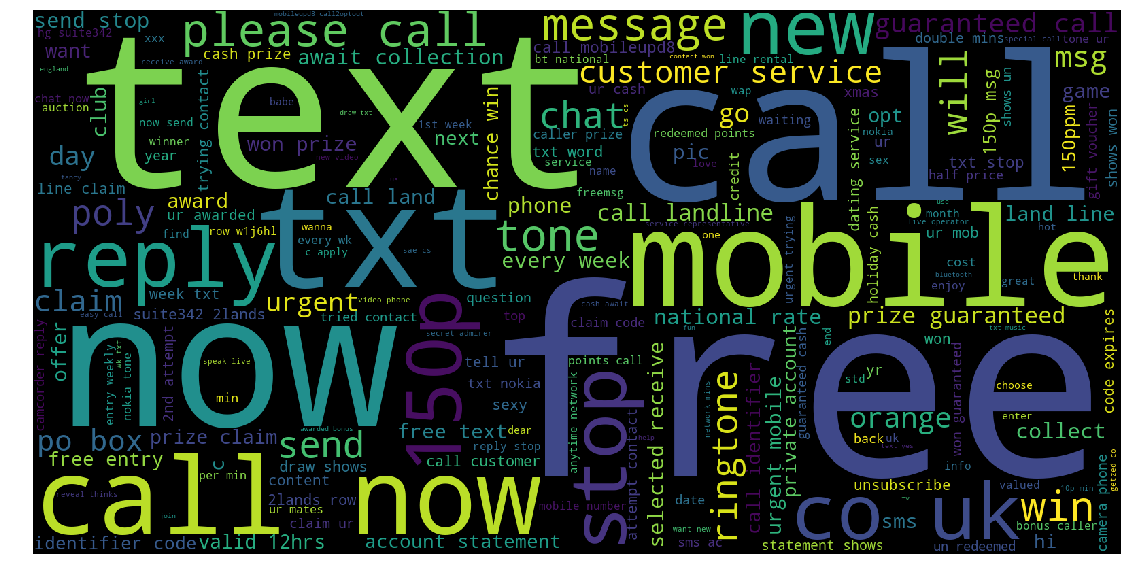

In [77]:
visualize('spam')

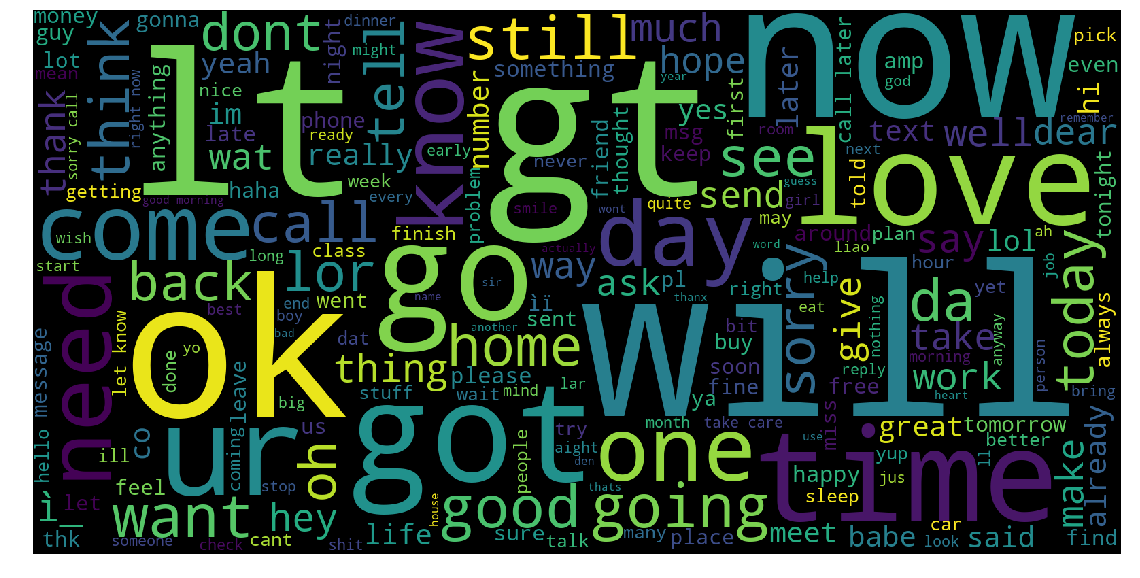

In [78]:
visualize('ham')

In [73]:
# Visualize the delta of why we're only getting 99%. Visualizing 1% that's wrong
df['predictions'] = model.predict(K)

In [74]:
# Data that went undetected which should have been spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
For sale - arsenal dartboard. Good condition but no doubles or trebles!
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x Callså£1/minMobsmoreLKPOBOX177HP

In [75]:
# Data that should  not have been classified as spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)


Finally the match heading towards draw as your prediction.
Hey company elama po mudyadhu.
Waiting for your call.
\Hello-/@drivby-:0quit edrunk sorry iff pthis makes no senrd-dnot no how ^ dancce 2 drum n basq!ihave fun 2nhite x ros xxxxxxx\""
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Check wid corect speling i.e. Sarcasm
U WILL SWITCH YOUR FONE ON DAMMIT!!
Ambrith..madurai..met u in arun dha marrge..remembr?
V-aluable. A-ffectionate. L-oveable. E-ternal. N-oble. T-ruthful. I-ntimate. N-atural. E-namous. Happy \VALENTINES DAY\" in advance"
Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.
I know complain num only..bettr directly go to bsnl offc nd apply for it..
Ultimately tor motive tui achieve korli.
\NONE!NOWHERE IKNO DOESDISCOUNT!SHITINNIT\""
Mostly sports type..lyk footbl,crckt..
Please protect yourself from e-threats. SIB n